<a href="https://colab.research.google.com/github/obcarr24/My-Repository/blob/main/HubbleConstant2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# So, given the data from file "Tonry et al.2003." we are going to calculate the hubble constant, and from that
# calculate the age of the universe.

In [3]:
# First I'm going to import all the libraries I need to run this code.

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [4]:
# Then I'm going to import the file with the data I need.

from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot 2.txt to Tonry_2003.vot 2.txt


In [6]:
# Then I'm going to read and print the file cause I want to see what the data table looks like.

data = astropy.io.ascii.read("Tonry_2003.vot 2.txt")
print(data)

  col1     col2    col3   col4    col5    col6  col7  col8  col9  col10    col11  
-------- ------- ------- ------ -------- ----- ----- ----- ----- -------- --------
 SN1972E  314.84   30.08 0.0023    N5253    16 2.839 2.399 0.033 204.9697 -31.6692
 SN1980N 240.161 -56.689 0.0056    N1316     9 3.225  3.14 0.043  50.6753 -37.2074
 SN1981B  292.97  64.743 0.0072    N4536     2 3.334 3.077 0.041 188.6233   2.1995
 SN1981D 240.161 -56.689 0.0056    N1316     9 3.225 3.044 0.055  50.6753 -37.2074
 SN1986G 309.543  19.401 0.0027    N5128    26 2.908  2.44 0.035 201.4028 -43.0316
 SN1988U   8.737 -81.227   0.31     Anon    24 4.968 5.096 0.072   3.5756 -30.4164
 SN1989B 241.991  64.403 0.0036    N3627    37 3.033 2.844  0.03 170.0578  12.9718
 SN1990N 294.369  75.987 0.0044    N4639    21  3.12 3.204 0.035 190.7367  13.2566
 SN1990O  37.654   28.36 0.0307 M+034403    10 3.964 3.977 0.025 258.8999  16.3241
 SN1990T 341.503 -31.526   0.04   P63925    10 4.079 4.101 0.042 299.7601 -56.2583
    

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0.5, 1.0, 'Hubble Data Points (Distance vs. Time)')

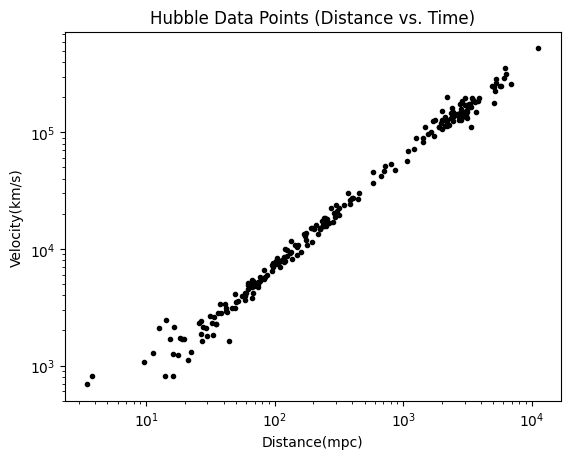

In [7]:
# In the actual report, it shows that the velocity and the distance have undergone mathematical operations that IF i
# don't reverse, will give me the wrong answer and plot that I am looking for. Once I revese them I will plot it.

# Reversing the mathematical operations:

distance = ((10**data["col8"])/ (72.0)) * u.mpc

redshift = 10**data["col7"] * u.km / u.s

# Plotting it:

plt.plot((distance.to(u.mpc).value), redshift.to(u.km/u.s).value, marker = ".", color = "black", linestyle = "none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance(mpc)")
plt.ylabel("Velocity(km/s)")
plt.title("Hubble Data Points (Distance vs. Time)")

In [9]:
# After plotting the data, we are going to fit it using a linear equation and overplot the model on top of the data.

x = distance.to(u.mpc).value # Setting the distance on the x-axis to mpc units.
ind = np.where((x > 0) & (x < 700)) # Ranging from 0 to 700 mpc.
z = np.polyfit(distance.to(u.mpc).value[ind], redshift.to(u.km / u.s).value[ind], 1) # creating the polynomial that
# best fits the data, where distance is the x, velocity is the y, and 1 represents the fit being linear.

In [10]:
p = np.poly1d(z) # creates a polynomial function p from the coefficients z,
# allowing me to evaluate the fitted polynomial at any given input.

velocity = p(distance.to(u.mpc).value) # This calculates the velocity values by applying p, the poly function to the distance
# values.

Text(50, 30000, 'H = 67.48 km/s/Mpc')

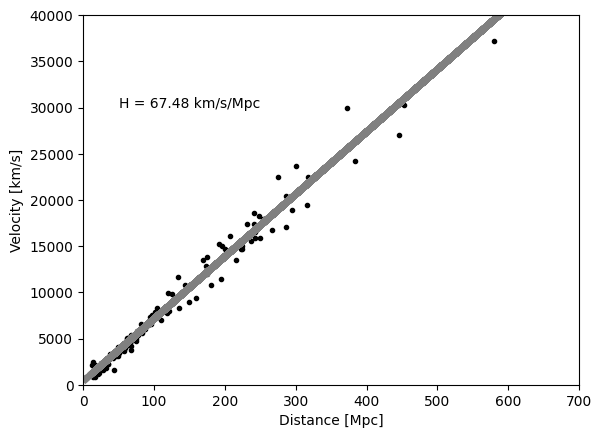

In [19]:
# Now we replot:

plt.plot((distance.to(u.mpc).value), redshift.to(u.km/u.s).value, marker = ".", color = "black", linestyle = "none")
plt.plot(distance.to(u.mpc).value, velocity, color="grey", linewidth=5) # this is our linear line plotted on the OG data that best fits
plt.xlim(0, 700) # limits for the line
plt.ylim(0, 4e4) # limits for the line.
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"H = {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000)) # Puts the calculate hubble constant on the graph.

In [21]:
# If the Hubble Constant is 67.48 km/s/Mpc, we can calculate the age of the universe given our measured hubble constrant.

H = 67.48 * u.km / u.s / u.Mpc
age = 1 / H
age = age.to(u.yr)
print(age)

14490104055.731909 yr
